# Example usage of xlum-python

## Import modules and xlum_python

In [1]:
import sys, os, pandas as pd 
from dataclasses import asdict

DIRNAME = os.getcwd()
sys.path.append(
    os.path.join(
        DIRNAME,
        '..',
        'xlum')
)

from data.classes import XlumMeta, Sample, Record, Sequence, Curve
import importer

## Load examples xlum file

In [2]:
obj: XlumMeta = importer.from_xlum(
    os.path.join(
        DIRNAME,
        "..",
        "assets",
        "xlum_example.xlum"
    )
)

sample
thermocouple
PMT
PMT


In [3]:
obj.df

,XlumMeta.formatVersion,XlumMeta.author,XlumMeta.lang,XlumMeta.license,Samples.name,Samples.mineral,Samples.latitude,Samples.longitude,Samples.altitude,Samples.doi,Samples.comment,Samples.state,Samples.parentID
0,1.0,Marie Skłodowska-Curie; Max Karl Ernst Ludwig ...,en,CC BY,LUM-21321,quartz,52.409139,-4.070245,50.0,valid DOI,NA,State.UNKNOWN,NA


In [4]:
obj.lstSamples[0].df

,Sample.name,Sample.mineral,Sample.latitude,Sample.longitude,Sample.altitude,Sample.doi,Sample.comment,Sample.state,Sample.parentID,Sequences.fileName,Sequences.software,Sequences.readerName,Sequences.readerSN,Sequences.readerFW,Sequences.comment,Sequences.state,Sequences.parentID
0,LUM-21321,quartz,52.409139,-4.070245,50.0,valid DOI,NA,State.UNKNOWN,NA,Testsequence.seq,DeviceEditor 2.0,NA,NA,NA,NA,State.UNKNOWN,NA


In [5]:
obj.lstSamples[0].lstSequences[0].df

,Sequence.fileName,Sequence.software,Sequence.readerName,Sequence.readerSN,Sequence.readerFW,Sequence.comment,Sequence.state,Sequence.parentID,Records.recordType,Records.sequenceStepNumber,Records.sampleCondition,Records.comment,Records.state,Records.parentID
0,Testsequence.seq,DeviceEditor 2.0,NA,NA,NA,NA,State.UNKNOWN,NA,RecordType.TL,1,SampleCondition.NA,NA,State.UNKNOWN,NA
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RecordType.GSL,2,SampleCondition.NA,standard green OSL step,State.NA,standard green OSL step


In [6]:
obj.lstSamples[0].lstSequences[0].lstRecords[0].df

,Record.recordType,Record.sequenceStepNumber,Record.sampleCondition,Record.comment,Record.state,Record.parentID,Curves.component,Curves.startDate,Curves.curveType,Curves.duration,...,Curves.vLabel,Curves.xUnit,Curves.yUnit,Curves.tUnit,Curves.vUnit,Curves.detectionWindow,Curves.filter,Curves.comment,Curves.state,Curves.parentID
0,RecordType.TL,1.0,SampleCondition.NA,NA,State.UNKNOWN,NA,thermocouple,2021-02-14 22:57:12,CurveType.MEASURED,0.0,...,temperature,,,s,K,NA,NA,NA,State.UNKNOWN,NA
1,NaN,NaN,NaN,NaN,NaN,NaN,PMT,2021-02-14 22:57:12,CurveType.MEASURED,0.0,...,luminescence,,,s,cts,375,Hoya U340; Delta BP 365/50EX,NA,State.UNKNOWN,NA


In [7]:
obj.lstSamples[0].lstSequences[0].lstRecords[0].lstCurves[0].df

,curve,component,startDate,curveType,duration,offset,xValues,yValues,tValues,xLabel,...,vLabel,xUnit,yUnit,tUnit,vUnit,detectionWindow,filter,Curve.comment,Curve.state,Curve.parentID
0,"[293.0, 303.0, 313.0, 323.0, 333.0, 343.0, 353...",thermocouple,2021-02-14 22:57:12,CurveType.MEASURED,0.0,0.0,[],[],[],NA,...,temperature,,,s,K,NA,NA,NA,State.UNKNOWN,NA


In [8]:
obj.lstSamples[0].lstSequences[0].lstRecords[0].lstCurves[0].lstValues

[293.0, 303.0, 313.0, 323.0, 333.0, 343.0, 353.0, 363.0, 373.0, 383.0]

In [9]:
curve = obj.lstSamples[0].lstSequences[0].lstRecords[0].lstCurves[0].lstValues
print(curve[0].__class__.__name__, curve[0])

float 293.0


## Showcase functions

### Requirements
- MatPlotLib: `conda install matplotlib`

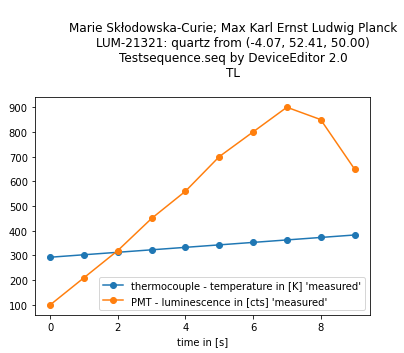

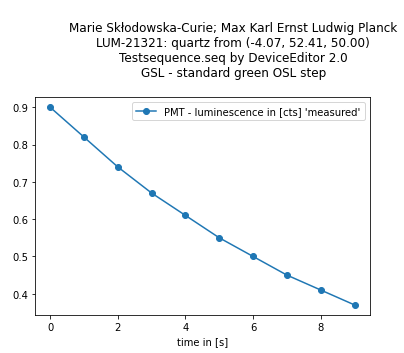

In [10]:
from matplotlib import pyplot as plt

for sample in obj.lstSamples:
    sample: Sample
    for idx_s, sequence in enumerate(sample.lstSequences):
        for idx_r, record in enumerate(sequence.lstRecords):
            plt.figure(idx_s*100+idx_r)
            for curve in record.lstCurves:
                plt.plot(curve.lstValues, "o-", label=f"{curve.component} - {curve.vLabel} in [{curve.vUnit}] '{curve.curveType.name.lower()}'")
                plt.xlabel(f"{curve.tLabel} in [{curve.tUnit}]")
                if curve.yLabel != "NA":
                    plt.ylabel(f"{curve.yLabel} in [{curve.yUnit}]")
            plt.title(
                f"""
                {obj.author}
                {sample.name}: {sample.mineral} from ({sample.longitude:.2f}, {sample.latitude:.2f}, {sample.altitude:.2f})
                {sequence.fileName} by {sequence.software}
                {record.recordType.name}{' - '+ record._meta.comment if record._meta.comment != "NA" else ""}
                """
                )
            plt.legend()
            plt.savefig(record.recordType.name + '.pdf', format = "pdf", bbox_inches='tight')